<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
import matplotlib.image as mpimg

In [5]:
image = mpimg.imread('./mailru.jpg')

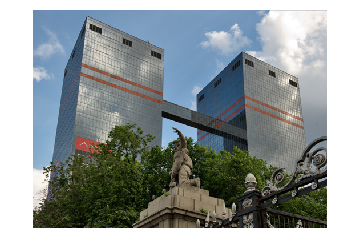

In [6]:
plt.axis("off")
plt.imshow(image)
plt.show()

In [7]:
data = image.reshape((image.shape[0]*image.shape[1],3))

In [8]:
from sklearn.cluster import KMeans

In [9]:
from sklearn.cluster import MiniBatchKMeans

In [10]:
%timeit kmeans = KMeans(init='random', n_clusters=64, random_state=0).fit(data)

The slowest run took 5.51 times longer than the fastest. This could mean that an intermediate result is being cached.
9min 36s ± 8min 50s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [11]:
%timeit kmeans = KMeans(init='k-means++', n_clusters=64, random_state=0).fit(data)

3min 26s ± 2.74 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [12]:
%timeit kmeans = MiniBatchKMeans(init='random', n_clusters=64, random_state=0).fit(data)

3.03 s ± 45.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [28]:
kmeans = MiniBatchKMeans(init='random', n_clusters=64, random_state=0).fit(data)

In [30]:
new_image[-5:]

array([[[98, 96, 81],
        [46, 58, 18],
        [38, 47, 20],
        ...,
        [ 3,  4,  1],
        [ 3,  4,  1],
        [ 3,  4,  1]],

       [[54, 52, 39],
        [54, 52, 39],
        [38, 36, 29],
        ...,
        [30, 39, 14],
        [ 9, 15,  3],
        [ 3,  4,  1]],

       [[54, 52, 39],
        [46, 58, 18],
        [30, 39, 14],
        ...,
        [33, 46,  8],
        [33, 46,  8],
        [16, 15, 11]],

       [[60, 68, 34],
        [46, 58, 18],
        [38, 47, 20],
        ...,
        [16, 26,  5],
        [38, 47, 20],
        [16, 26,  5]],

       [[54, 52, 39],
        [54, 52, 39],
        [54, 52, 39],
        ...,
        [16, 26,  5],
        [16, 26,  5],
        [29, 26, 16]]], dtype=uint8)

In [23]:
proc_data = kmeans.predict(data)

In [24]:
new_image = []
for cluster in proc_data:
    new_image.append(kmeans.cluster_centers_[cluster])

In [25]:
new_image = np.array(new_image).astype(np.uint8)

In [26]:
new_image = new_image.reshape((image.shape[0],image.shape[1],3))

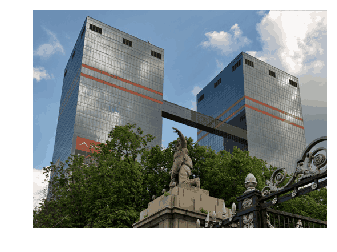

In [27]:
plt.axis("off")
plt.imshow(new_image)
plt.show()